In [ ]:
# matplotlib homnework

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics as sts
import seaborn as sn 

# Study data files
mouse_metadata_path = "/Users/rodneydavermann/Desktop/Matplotlib_Challenge/data/Mouse_data.csv"
study_results_path = "/Users/rodneydavermann/Desktop/Matplotlib_Challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_combine = pd.merge(mouse_metadata,study_results,how="inner", on = "Mouse ID")

# Display the data table for preview
mouse_study_data_combine

# Checking the number of mice.
mice_number = len(mouse_study_data_combine["Mouse ID"])
mice_number

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate_ID_Timepoint = mouse_study_data_combine[mouse_study_data_combine.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicate_ID_Timepoint

# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_ID = mouse_study_data_combine[mouse_study_data_combine.duplicated(["Mouse ID",])]
mice_duplicate_ID       

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
tiny_mouse_study_data = mouse_study_data_combine.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
tiny_mouse_study_data

# Checking the number of mice in the clean DataFrame.
new_mice_number = len(tiny_mouse_study_data["Mouse ID"])
new_mice_number

#Summary Statistics

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume  with the raw data
summary_statistics_describe = tiny_mouse_study_data["Tumor Volume (mm3)"].describe() 
summary_statistics_describe

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_volume_average = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
tumor_volume_median = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
tumor_volume_variance = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
tumor_volume_standard = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
tumor_volume_sem = tiny_mouse_study_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

summary_statistics_groupby = pd.DataFrame({"Mean":tumor_volume_average , "Median": tumor_volume_median,
                                            "Variance": tumor_volume_variance, 
                                            "Standard Deviation": tumor_volume_standard, "SEM": tumor_volume_sem})

summary_statistics_groupby

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_summary_aggregate = tiny_mouse_study_data.agg({"Tumor Volume (mm3)": ["mean", "median", "std", "sem"]})
tumor_volume_summary_aggregate

  #Bar and Pie Charts
    
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barplot_data = pd.DataFrame(tiny_mouse_study_data.groupby(["Drug Regimen"]).count()).reset_index()
barplot_data = barplot_data.sort_values(by="Mouse ID", ascending=False) 
barplot_data = barplot_data[["Drug Regimen", "Mouse ID"]]
barplot_data = barplot_data.set_index("Drug Regimen")
barplot_data.plot(kind="bar", figsize=(10,5))
plt.title("Drug Treatment Count")
plt.ylabel("Number of Unique Mice Tested")
plt.show()
plt.tight_layout()


# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# convert the index column of the summary statistics groupby as a list of type of drug regimen
drug_regimen = summary_statistics_groupby.index.tolist()

# count the number of drug 
drug_regimen_count = (tiny_mouse_study_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

# bar plot with pyplot
plt.figure(figsize=(11,4))
x_axis = np.arange(0, len(drug_regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.xlim(-0.75, len(drug_regimen)-.25)
plt.ylim(0, max(drug_regimen_count) + 5)

plt.bar(x_axis, drug_regimen_count, facecolor="green", alpha=0.75, align="center")
plt.xticks(tick_locations, drug_regimen)
plt.show()

# Generate a pie plot showing the distribution of female versus male mice using pandas

# determine the total number of male and female mice 
pie_chart_data = (tiny_mouse_study_data.groupby(["Sex"]).count()).reset_index()

# select the two first rows, and the two first columns from the pie_chart_data
pie_chart_data_gender = pie_chart_data.loc[0:1, "Sex":"Mouse ID"] 

# pie plot with pandas
pie_chart_data_gender.groupby(["Sex"]).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(15,10), autopct='%1.1f%%')
plt.title("Distribution in percentage of mice by sex")
plt.ylabel("Sex")

  






# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
# add subset 
    
    
# Determine outliers using upper and lower bounds
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
  #Line and Scatter Plots
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
  #Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

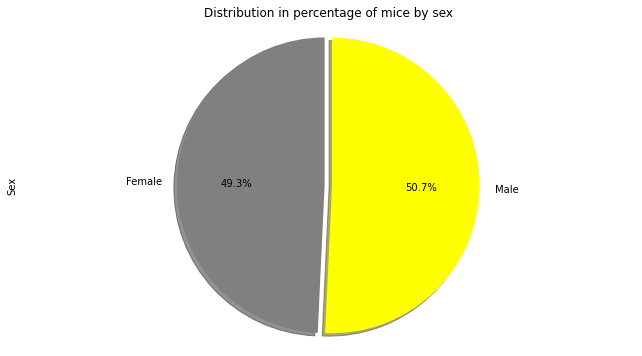

In [3]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# data for pie chart with pyplot
sex_labels = ["Female", "Male"]
count_sex = (tiny_mouse_study_data.groupby(["Sex"])["Age_months"].count()).tolist()
count_sex
colors = ["gray", "yellow"]
explode = (0, 0.05)
plt.figure(figsize=(11,6))
plt.title("Distribution in percentage of mice by sex")
plt.ylabel("Sex")
plt.pie(count_sex, explode=explode, labels= sex_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

In [2]:
# quartiles, outliers and boxplots

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics as sts
import seaborn as sn 

# Study data files
mouse_metadata_path = "/Users/rodneydavermann/Desktop/Matplotlib_Challenge/data/Mouse_data.csv"
study_results_path = "/Users/rodneydavermann/Desktop/Matplotlib_Challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_combine = pd.merge(mouse_metadata,study_results,how="inner", on = "Mouse ID")

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
tiny_mouse_study_data = mouse_study_data_combine.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
tiny_mouse_study_data


# Start by getting the last (greatest) timepoint for each mouse
tiny_mouse_study_data_sorted = tiny_mouse_study_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_timepoint = tiny_mouse_study_data_sorted.loc[tiny_mouse_study_data_sorted["Timepoint"] == 45]
last_timepoint.head().reset_index()


# Capomulin data
capomulin = last_timepoint[last_timepoint["Drug Regimen"].isin(["Capomulin"])]
capomulin.head().reset_index()
capomulin_data = capomulin.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_data = capomulin_data["Tumor Volume (mm3)"]
capomulin_data

# calculate quartile for capomulin drug 
capomulin_quartiles = capomulin_data.quantile([.25,.5,.75])
lower_quartile = capomulin_quartiles[0.25]
upper_quartile = capomulin_quartiles[0.75]
interval_inter_quartile = upper_quartile - lower_quartile

print(f"The lower quartile of temperatures is: {lower_quartile}")
print(f"The upper quartile of temperatures is: {upper_quartile}")
print(f"The interquartile range of temperatures is: {interval_inter_quartile}")
print(f"The median of temperatures is: {capomulin_quartiles[0.5]}")

capomulin_lower_bound = lower_quartile - (1.5*interval_inter_quartile)
capomulin_upper_bound = upper_quartile + (1.5*interval_inter_quartile)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
